In [1]:
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import AltAz
from astropy.coordinates import SkyCoord

import numpy as np

import datetime

%matplotlib inline
from matplotlib import pyplot as plt

In [83]:
def plot_ppta_pulsars_for_parkes(observing_time):
    # Parkes
    observing_location = EarthLocation(lat='-32d59m54.263s', lon='148d15m48.636s', height=414.8*u.m)  # 

    aa = AltAz(location=observing_location, obstime=observing_time)
    
    target_list = [['16:03:35.60', '-72:02:32.6'], ['16:00', '-30:53'], ['17:44', '-11:34'], ['04:37:15.8961737', '-47:15:09.110714'], 
        ['06:13', '-02:00'], ['07:11:54.189114', '-68:30:47.41446'], ['10:17:51.32828', '-71:56:41.64586'], 
        ['10:22', '+10:01'], ['10:24', '-07:19'], ['10:45:50.18696', '-45:09:54.1223'], 
        ['11:25:55.2180', '-60:14:06.608'], ['14:46:35.71391', '-47:01:26.7675'], ['15:45:55.94596', '-45:50:37.5272'], 
        ['16:43', '-12:24'], ['17:13', '+07:47'], ['17:30:21.66624', '-23:04:31.19'], ['18:24:32.00788', '-24:52:10.834'], 
        ['18:32', '-08:36'], ['18:57', '+09:43'], ['19:09:47.4346749', '-37:44:14.46674'],
        ['19:39:38.561224', '+21:34:59.12570'], ['21:24:43.849372','-33:58:44.8500'], 
        ['21:29:22.766966','-57:21:14.21183'], ['21:45:50.460593','-07:50:18.4876'], 
        ['22:41:42.01850','-52:36:36.2260'], ['09h18m05.7s', '-12d05m44s']]
    labels = ['J1603-7202', 'J1600-3053', 'J1744-1134', 'J0437-4715', 'J0613-0200', 'J0711-6830', 
        'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1446-4701', 'J1545-4550',
        'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1824-2452A', 'J1832-0836', 'J1857+0943', 'J1909-3744',
        'J1939+2134', 'J2124-3358', 'J2129-5721', 'J2145-0750', 'J2241-5236', 'Hydra']

    target_locs = SkyCoord(target_list, unit=(u.hourangle, u.deg), frame='icrs')
    sky_locs = target_locs.transform_to(aa)

    theta = sky_locs.az.to(u.rad).value
    r = 90-sky_locs.alt.value

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_yticklabels(map(str, range(80, 10, -10)))   # Change the labels

    circle = np.linspace(0,2*np.pi,100)
    ax.plot(circle,[59.75 for t in circle],color='#AA5555')   #Colors are set by hex codes

    ax.scatter(theta, r)

    ax.set_rmax(70)

    for i, txt in enumerate(labels):
        ax.annotate('  ' +txt, xy=(theta[i], r[i]))

    ax.set_title("PPTA Pulsar Visibility at Parkes as at {} UTC".format(observing_time))



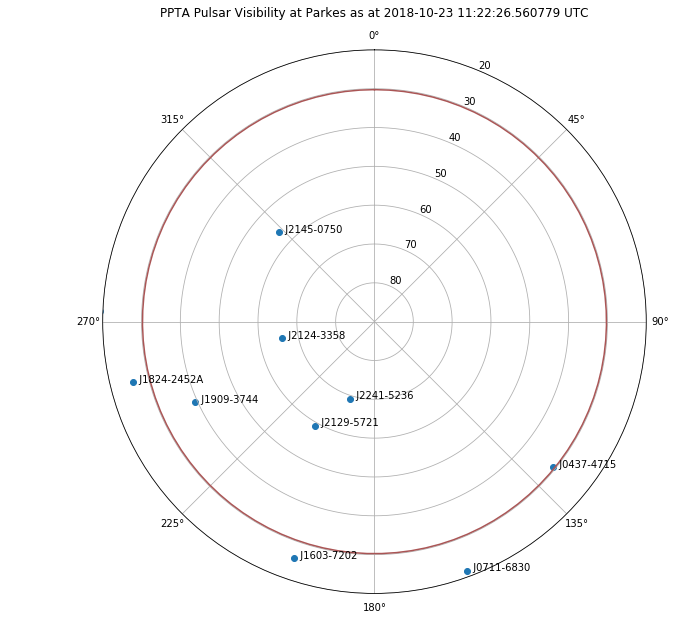

In [85]:
# Now
observing_time = datetime.datetime.utcnow()
#observing_time = Time('2018-10-20 23:50')  # Must be a UTC time

plot_ppta_pulsars_for_parkes(observing_time)